In [27]:
import pandas as pd
import numpy as np
import glob
from openpyxl import load_workbook

import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
# Load the Excel file
workbook = load_workbook(filename='lstmmodel/SHARE PRICES 1990 - 2008.xlsx', read_only=True)

# Get a list of all sheet names in the workbook
sheet_names = workbook.sheetnames

# Loop through all sheets and save each to a separate CSV file
for sheet_name in sheet_names:
    # Load the sheet into a pandas dataframe
    sheet = pd.read_excel('lstmmodel/SHARE PRICES 1990 - 2008.xlsx', sheet_name=sheet_name)
    
    # Save the sheet to a CSV file with the same name as the sheet
    sheet.to_csv(f'lstmmodel/{sheet_name}.csv', index=False)


C:\Users\Benjamin\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [5]:
# Create a list of all CSV files in the directory
csv_files = glob.glob('lstmmodel/*.csv')

# Create an empty list to store the data frames
dfs = []

# Loop through the CSV files and import them as data frames
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Find the common column names across all data frames
common_cols = list(set.intersection(*[set(df.columns) for df in dfs]))

# Select only the common columns from each data frame
dfs_common = [df[common_cols] for df in dfs]



In [9]:
# Concatenate the data frames
merged_df = pd.concat(dfs_common)

# Sort the data frame by the 'Date' column
merged_df.sort_values('Date', inplace=True)

# Reset the index
merged_df.reset_index(drop=True, inplace=True)

In [10]:
merged_df.head()

,HFC,UNIL,MLC,ALW,AYRTN,ETI,Date,CPC,BOPP,PBC,...,ABL,GWEB,CMLT,TRANSOL,SWL,FML,GSR,CAL,SCB,GCB
0,0.69,17.78,0.1,0.08,0.07,0.17,01/02/2019,0.02,5.09,0.04,...,NaN,-,0.10,-,0.05,8.00,9.5,0.98,21.08,4.6
1,0.56,16.40,0.09,0.1,0.08,0.08,01/02/2020,0.02,2.86,0.03,...,NaN,-,0.09,-,0.05,4.12,9.5,0.89,18.40,5.1
2,0.69,17.78,0.1,0.08,0.07,0.16,01/03/2019,0.02,4.35,0.04,...,NaN,-,0.10,-,0.05,8.00,9.5,0.99,21.08,4.6
3,0.56,16.40,0.09,0.1,0.08,0.08,01/03/2020,0.02,2.86,0.03,...,NaN,-,0.09,-,0.05,4.12,9.5,0.89,18.40,5.1
4,0.69,17.78,0.1,0.08,0.08,0.18,01/04/2019,0.02,5.00,0.04,...,NaN,-,0.10,-,0.05,8.00,9.5,0.99,21.08,4.6


In [12]:
print(f'The DataFrame has {len(merged_df)} rows and {merged_df.shape[1]} columns.')

The DataFrame has 6153 rows and 25 columns.


In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6153 entries, 0 to 6152
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   HFC      6027 non-null   object 
 1   UNIL     6027 non-null   float64
 2   MLC      6027 non-null   object 
 3   ALW      6027 non-null   object 
 4   AYRTN    3468 non-null   float64
 5   ETI      3725 non-null   float64
 6   Date     6153 non-null   object 
 7   CPC      4368 non-null   float64
 8   BOPP     4130 non-null   float64
 9   PBC      4764 non-null   float64
 10  GOIL     3521 non-null   float64
 11  CFAO     3343 non-null   object 
 12  GGBL     6027 non-null   float64
 13  CLYD     4174 non-null   float64
 14  SIC      3476 non-null   float64
 15  ABL      3334 non-null   float64
 16  GWEB     3824 non-null   object 
 17  CMLT     4867 non-null   float64
 18  TRANSOL  3953 non-null   object 
 19  SWL      4470 non-null   float64
 20  FML      6027 non-null   float64
 21  GSR      3461 

In [17]:
#List the columns for different datatypes:
print('List of all Columns: ')
print(merged_df.columns)
print('\n')
print('Integer Type: ')
Col_int = merged_df.select_dtypes(np.int64).columns
print(Col_int)
print('\n')
print('Float Type: ')
Col_float = merged_df.select_dtypes(np.float64).columns
print(Col_float)
print('\n')
print('Object Type: ')
Col_cat = merged_df.select_dtypes(object).columns
print(Col_cat)
print('\n')
print('Count:')
print(merged_df.dtypes.value_counts())

List of all Columns: 
Index(['HFC', 'UNIL', 'MLC', 'ALW', 'AYRTN', 'ETI', 'Date', 'CPC', 'BOPP',
       'PBC', 'GOIL', 'CFAO', 'GGBL', 'CLYD', 'SIC', 'ABL', 'GWEB', 'CMLT',
       'TRANSOL', 'SWL', 'FML', 'GSR', 'CAL', 'SCB', 'GCB'],
      dtype='object')


Integer Type: 
Index([], dtype='object')


Float Type: 
Index(['UNIL', 'AYRTN', 'ETI', 'CPC', 'BOPP', 'PBC', 'GOIL', 'GGBL', 'CLYD',
       'SIC', 'ABL', 'CMLT', 'SWL', 'FML', 'GSR', 'CAL', 'SCB'],
      dtype='object')


Object Type: 
Index(['HFC', 'MLC', 'ALW', 'Date', 'CFAO', 'GWEB', 'TRANSOL', 'GCB'], dtype='object')


Count:
float64    17
object      8
dtype: int64


In [21]:
merged_df.describe()

,UNIL,AYRTN,ETI,CPC,BOPP,PBC,GOIL,GGBL,CLYD,SIC,ABL,CMLT,SWL,FML,GSR,CAL,SCB
count,6027.000000,3468.000000,3725.000000,4368.000000,4130.000000,4764.000000,3521.000000,6027.000000,4174.000000,3476.000000,3334.000000,4867.000000,4470.000000,6027.000000,3461.000000,4101.000000,6027.000000
mean,3540.038364,136.658694,1862.621397,177.503775,1322.363697,640.445493,1.264999,1906.493307,216.495335,0.275009,602.967481,363.604405,76.436260,3155.530439,4.261745,651.543016,31140.258937
std,6733.169477,337.144763,5260.442482,337.338405,2655.171097,1148.919750,1.008926,3965.482993,416.507131,0.149093,469.029691,620.901232,124.369514,6985.053209,2.959303,1466.024753,63827.851669
min,3.390000,0.070000,0.060000,0.010000,0.450000,0.030000,0.140000,1.200000,0.030000,0.080000,0.080000,0.080000,0.020000,1.650000,1.800000,0.170000,8.490000
25%,8.850000,0.100000,0.120000,0.020000,2.080000,0.050000,0.320000,1.800000,0.030000,0.130000,234.000000,0.120000,0.030000,5.480000,2.340000,0.550000,19.335000
50%,17.790000,0.160000,0.160000,0.020000,3.200000,0.180000,1.080000,4.510000,0.040000,0.290000,510.500000,0.160000,0.050000,13.760000,2.750000,0.900000,48.010000
75%,1850.000000,0.170000,0.260000,530.000000,6.922500,450.000000,1.740000,910.000000,0.080000,0.390000,1150.000000,430.000000,265.000000,1038.500000,5.200000,1.170000,21000.000000
max,27500.000000,978.000000,23200.000000,1950.000000,13000.000000,3920.000000,5.010000,21600.000000,1605.000000,0.630000,1480.000000,1800.000000,290.000000,36000.000000,9.500000,7000.000000,308300.000000


In [23]:
merged_df.describe(include="object").transpose()

,count,unique,top,freq
HFC,6027,298,-,472
MLC,6027.0,187.0,0.09,844.0
ALW,6027,254,-,736
Date,6153,5912,31/12/2019,2
CFAO,3343.0,118.0,0.03,323.0
GWEB,3824,8,-,951
TRANSOL,3953,29,-,951
GCB,6027,1016,-,652


In [30]:
# Removes Data Duplicates while Retaining the First one
def remove_duplicate(data):
    data.drop_duplicates(keep="first", inplace=True)
    return "Checked Duplicates"

# Removes Duplicates from train data if any
remove_duplicate(merged_df)

'Checked Duplicates'

In general, it is recommended to keep the percentage of missing data below 5-10% of the total number of observations. However, this is not always possible or practical, and some models can tolerate higher percentages of missing data if they are properly handled.

There are various ways to handle missing data in machine learning, such as imputation (filling in missing values with estimated values), deletion (removing observations with missing values), or using algorithms that are specifically designed to handle missing data (such as decision trees and random forests).

Little, R. J. A., & Rubin, D. B. (2019). Statistical analysis with missing data. John Wiley & Sons.
Gelman, A., & Hill, J. (2007). Data analysis using regression and multilevel/hierarchical models. Cambridge University Press.
Schafer, J. L., & Graham, J. W. (2002). Missing data: our view of the state of the art. Psychological methods, 7(2), 147-177.

In [31]:
# Check for missing values
print('missing values:', merged_df.isnull().sum().sort_values(ascending = False))

missing values: GSR        2692
SIC        2677
GOIL       2632
AYRTN      2601
ABL        2581
CFAO       2572
ETI        2428
GWEB       2329
TRANSOL    2200
CAL        2052
BOPP       2023
CLYD       1979
CPC        1785
SWL        1683
PBC        1389
CMLT       1286
FML         126
SCB         126
HFC         126
GGBL        126
UNIL        126
ALW         126
MLC         126
GCB         126
Date          0
dtype: int64


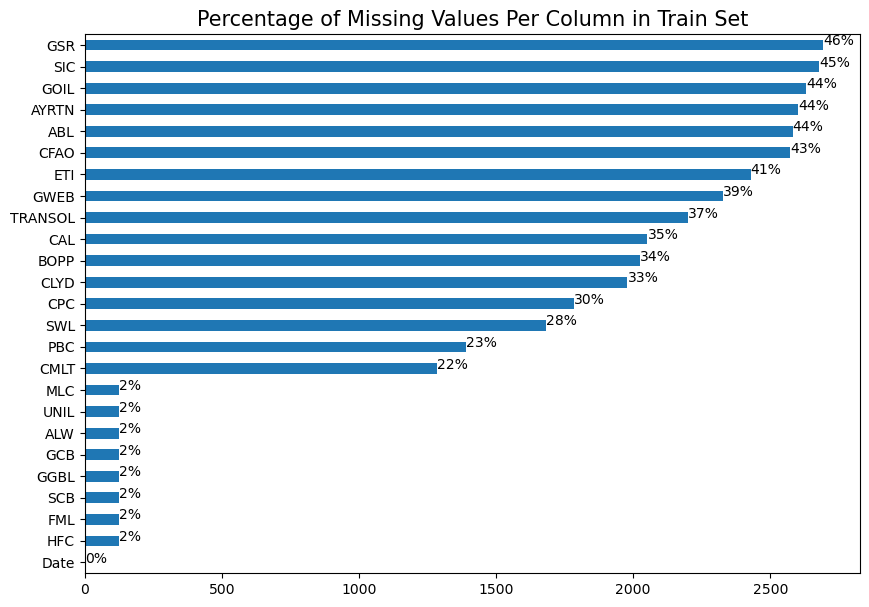

In [32]:
# Ploting any missing values in Data set
ax = merged_df.isna().sum().sort_values().plot(kind = 'barh', figsize = (10, 7))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/merged_df.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [33]:
merged_df.replace('-', np.nan, inplace=True)


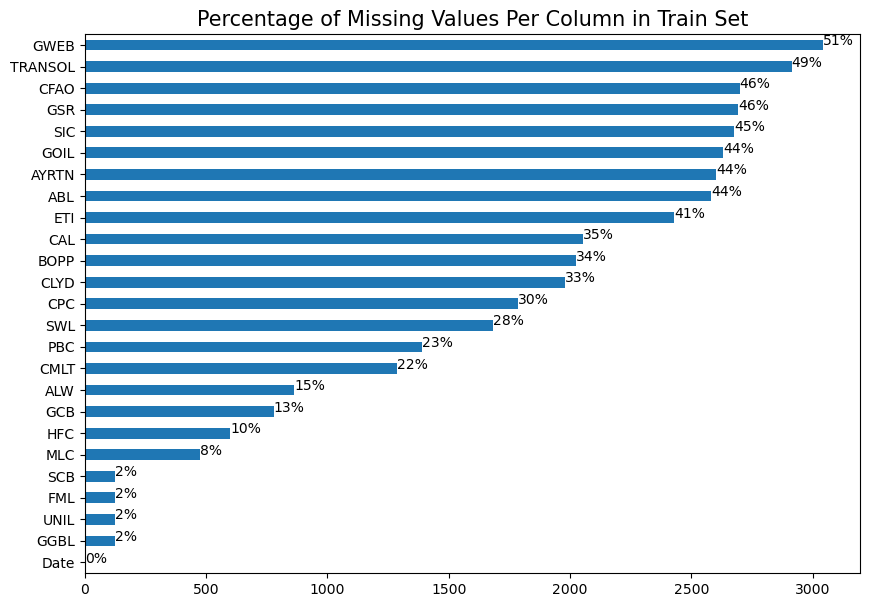

In [34]:
# Ploting any missing values in Data set after replacing - with nan
ax = merged_df.isna().sum().sort_values().plot(kind = 'barh', figsize = (10, 7))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/merged_df.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))


Drop columns based on percentage of NaN values in columns, we can use a pandas dropna() function. It can delete the columns or rows of a dataframe that contains all or few NaN values.

In [35]:
# Calculate the percentage of missing values in each column
missing_percent = (merged_df.isna().sum() / merged_df.shape[0]) * 100

# Select the columns with missing values above 30%
cols_to_drop = missing_percent[missing_percent > 30].index

# Drop the selected columns
merged_df = merged_df.drop(cols_to_drop, axis=1)


In [36]:
merged_df.columns

Index(['HFC', 'UNIL', 'MLC', 'ALW', 'Date', 'PBC', 'GGBL', 'CMLT', 'SWL',
       'FML', 'SCB', 'GCB'],
      dtype='object')

In [37]:
merged_df.head()

,HFC,UNIL,MLC,ALW,Date,PBC,GGBL,CMLT,SWL,FML,SCB,GCB
0,0.69,17.78,0.1,0.08,01/02/2019,0.04,2.18,0.10,0.05,8.00,21.08,4.6
1,0.56,16.40,0.09,0.1,01/02/2020,0.03,1.69,0.09,0.05,4.12,18.40,5.1
2,0.69,17.78,0.1,0.08,01/03/2019,0.04,2.18,0.10,0.05,8.00,21.08,4.6
3,0.56,16.40,0.09,0.1,01/03/2020,0.03,1.69,0.09,0.05,4.12,18.40,5.1
4,0.69,17.78,0.1,0.08,01/04/2019,0.04,2.18,0.10,0.05,8.00,21.08,4.6


In [38]:
merged_df.shape

(5915, 12)

In [39]:
print(merged_df.dtypes)


HFC      object
UNIL    float64
MLC      object
ALW      object
Date     object
PBC     float64
GGBL    float64
CMLT    float64
SWL     float64
FML     float64
SCB     float64
GCB      object
dtype: object


In [45]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%d/%m/%Y')
merged_df['HFC'] = pd.to_numeric(merged_df['HFC'], errors='coerce')
merged_df['MLC'] = pd.to_numeric(merged_df['MLC'], errors='coerce')
merged_df['ALW'] = pd.to_numeric(merged_df['ALW'], errors='coerce')
merged_df['GCB'] = pd.to_numeric(merged_df['GCB'], errors='coerce')
merged_df = merged_df.sort_values('Date')
merged_df = merged_df[['Date'] + [col for col in merged_df.columns if col != 'Date']]


In [46]:
merged_df.head()

,Date,HFC,UNIL,MLC,ALW,PBC,GGBL,CMLT,SWL,FML,SCB,GCB
336,1990-11-12,NaN,1800.0,NaN,NaN,NaN,83.0,NaN,NaN,25.0,200.0,NaN
337,1990-11-20,NaN,1600.0,NaN,NaN,NaN,85.0,NaN,NaN,25.0,200.0,NaN
338,1990-11-23,NaN,1650.0,NaN,NaN,NaN,85.0,NaN,NaN,25.0,200.0,NaN
339,1990-11-27,NaN,1655.0,NaN,NaN,NaN,86.0,NaN,NaN,25.0,255.0,NaN
340,1990-11-30,NaN,1655.0,NaN,NaN,NaN,84.0,NaN,NaN,25.0,255.0,NaN


In [47]:
merged_df.to_csv(f'lstmmodel/SharePrice.csv', index=False)